In [3]:
import yfinance as yf
import csv
import pandas as pd

### Load and Save the Stock Price Data

In [16]:
tsla = yf.download("TSLA", start='2020-01-01',end='2024-06-28')
tsla.to_csv("data/tsla_20200101_20240628.csv")
tsla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2024-06-21,182.300003,183.949997,180.690002,183.009995,183.009995,63029500
2024-06-24,184.970001,188.800003,182.550003,182.580002,182.580002,61992100
2024-06-25,184.399994,187.970001,182.009995,187.350006,187.350006,63678300


In [17]:
tsla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1.129000e+03
mean,206.551781,211.155937,201.594271,206.476155,206.476155,1.290871e+08
std,81.786820,83.412253,79.856345,81.599832,81.599832,8.497475e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,167.460007,170.880005,163.429993,167.820007,167.820007,7.727140e+07
50%,215.666672,220.800003,210.000000,215.660004,215.660004,1.044233e+08
75%,257.706665,261.859985,252.050003,257.500000,257.500000,1.491588e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [24]:
msft = yf.download("MSFT", start='2020-01-01',end='2024-06-28')
msft.to_csv("data/msft_20200101_20240628.csv")
msft.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1.129000e+03
mean,279.076315,281.940071,276.155509,279.195678,274.514945,2.958867e+07
std,69.976918,70.075199,69.709848,69.974516,71.559212,1.283428e+07
min,137.009995,140.570007,132.520004,135.419998,130.375595,9.200800e+06
25%,229.460007,232.869995,226.460007,228.869995,224.303726,2.144690e+07
50%,271.690002,274.600006,267.980011,271.399994,266.646637,2.645800e+07
75%,326.019989,329.989990,323.350006,327.000000,322.735382,3.360410e+07
max,452.179993,456.170013,451.769989,452.850006,452.850006,9.701270e+07


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
from numpy.random import seed
seed(0)

# EDA

### Load Data

In [3]:
# load stock data
msft = pd.read_csv('./data/msft_20200101_20240628.csv')
tsla = pd.read_csv('./data/tsla_20200101_20240628.csv')
# load sentiment data
msft_sent = pd.read_csv('./data/msft_with_sentiment_label.csv')
tsla_sent = pd.read_csv('./data/tsla_with_sentiment_label.csv')

In [4]:
msft

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.215683,22622100
1,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.295425,21116200
2,2020-01-06,157.080002,159.100006,156.509995,159.029999,152.689056,20813700
3,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.296906,21634100
4,2020-01-08,158.929993,160.800003,157.949997,160.089996,153.706772,27746500
...,...,...,...,...,...,...,...
1124,2024-06-21,447.380005,450.579987,446.510010,449.779999,449.779999,34486200
1125,2024-06-24,449.799988,452.750000,446.410004,447.670013,447.670013,15913700
1126,2024-06-25,448.250000,451.420013,446.750000,450.950012,450.950012,16747500
1127,2024-06-26,449.000000,453.600006,448.190002,452.160004,452.160004,16507000


In [3]:
company_list = [msft,tsla]

# EDA of Microsoft Data

In [4]:
print("###########Microsoft Stock Dataframe Info#############")
msft.info()
print("###########Microsoft Sentiment Analysis Dataframe Info#############")
msft_sent.info()


###########Microsoft Stock Dataframe Info#############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1129 non-null   object 
 1   Open       1129 non-null   float64
 2   High       1129 non-null   float64
 3   Low        1129 non-null   float64
 4   Close      1129 non-null   float64
 5   Adj Close  1129 non-null   float64
 6   Volume     1129 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 61.9+ KB
###########Microsoft Sentiment Analysis Dataframe Info#############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1535 non-null   object
 1   text    1535 non-null   object
 2   input   1535 non-null   object
 3   label   1535 non-null   object
dtypes: object(4)
memory u

In [7]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1.129000e+03
mean,279.076315,281.940071,276.155509,279.195678,274.514945,2.958867e+07
std,69.976918,70.075199,69.709848,69.974516,71.559212,1.283428e+07
min,137.009995,140.570007,132.520004,135.419998,130.375595,9.200800e+06
25%,229.460007,232.869995,226.460007,228.869995,224.303726,2.144690e+07
50%,271.690002,274.600006,267.980011,271.399994,266.646637,2.645800e+07
75%,326.019989,329.989990,323.350006,327.000000,322.735382,3.360410e+07
max,452.179993,456.170013,451.769989,452.850006,452.850006,9.701270e+07


In [9]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [23]:
end_day = datetime(2024,6,28)
start_day = datetime(2020,1,1)

num_of_days = end_day - start_day
num_of_days = num_of_days.days


1640

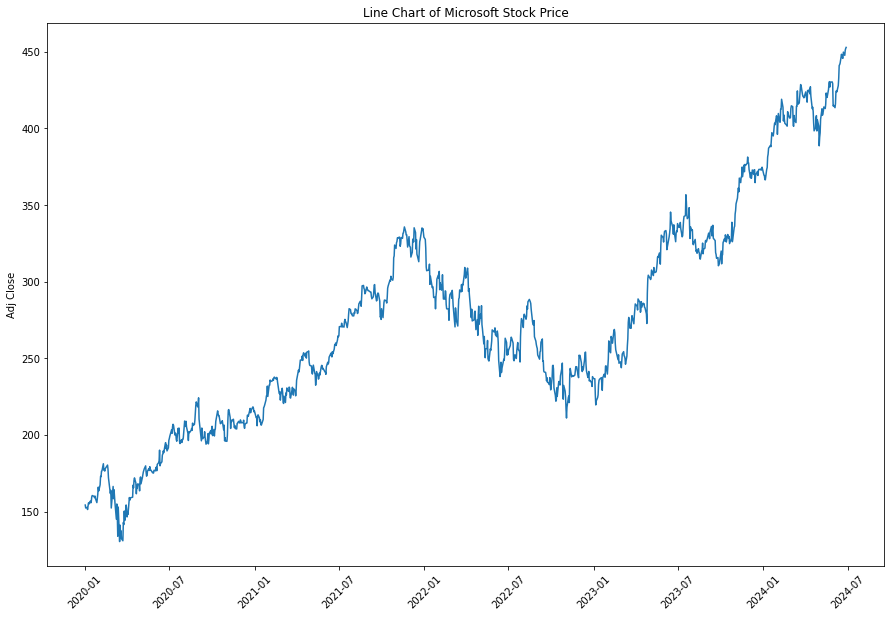

In [8]:
msft['Date'] = pd.to_datetime(msft['Date'])
plt.figure(figsize=(15,10))
plt.plot(msft['Date'],msft['Adj Close'])
# msft.plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.xticks(rotation = 45 )
plt.title("Line Chart of Microsoft Stock Price")
plt.show()

In [5]:
msft['Date'] = pd.to_datetime(msft['Date'])
msft_sent['date'] = pd.to_datetime(msft_sent['date'])
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla_sent['date'] = pd.to_datetime(tsla_sent['date'])


### What was the moving average of the stocks?
- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [14]:
ma_day = [10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()


<Figure size 1080x720 with 0 Axes>

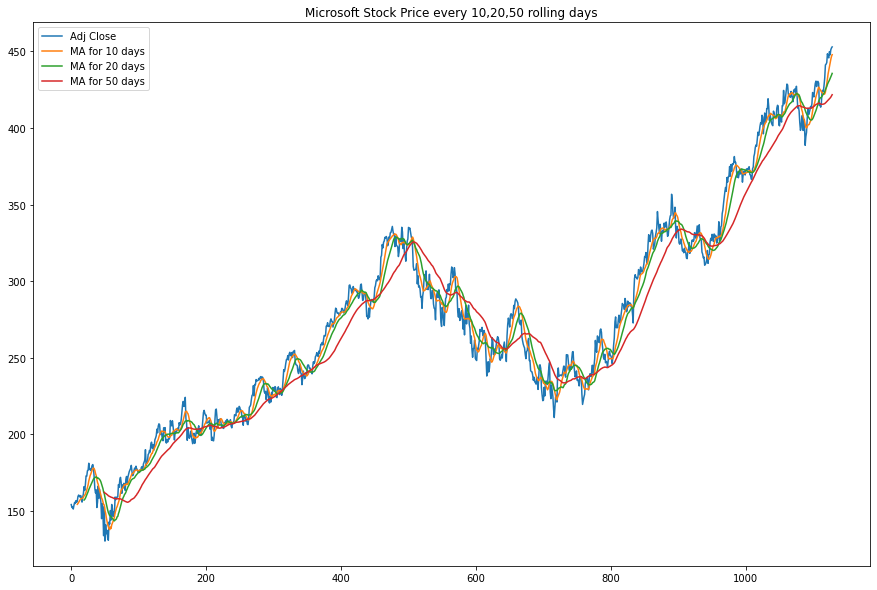

In [22]:
# fig, axes = plt.subplots(nrows =2, ncols = 2)
# fig.set_figheight(10)
# fig.set_figwidth(15)

# msft[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
# axes[0,0].set_title('Microsoft')
# plt.figure(figsize=(15,10))
msft[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15,10),title='Microsoft Stock Price every 10,20,50 rolling days')

In [4]:
### retrieve missing dates
pd.date_range(start = '2020-01-01', end = '2024-06-28' ).difference(msft.Date)

DatetimeIndex(['2020-01-01', '2020-01-04', '2020-01-05', '2020-01-11',
               '2020-01-12', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-25', '2020-01-26',
               ...
               '2024-06-01', '2024-06-02', '2024-06-08', '2024-06-09',
               '2024-06-15', '2024-06-16', '2024-06-19', '2024-06-22',
               '2024-06-23', '2024-06-28'],
              dtype='datetime64[ns]', length=512, freq=None)

# EDA of Tesla Data

In [22]:
print("###########Tesla Stock Dataframe Info#################")
tsla.info()
print("###########Tesla Sentiment Analysis Dataframe Info#################")
tsla_sent.info()

###########Tesla Stock Dataframe Info#################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1129 non-null   datetime64[ns]
 1   Open       1129 non-null   float64       
 2   High       1129 non-null   float64       
 3   Low        1129 non-null   float64       
 4   Close      1129 non-null   float64       
 5   Adj Close  1129 non-null   float64       
 6   Volume     1129 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 61.9 KB
###########Tesla Sentiment Analysis Dataframe Info#################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1414 non-null   datetime64[ns]
 1   text    1414 non-null   object     

In [8]:
tsla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1.129000e+03
mean,206.551781,211.155937,201.594271,206.476155,206.476155,1.290871e+08
std,81.786820,83.412253,79.856345,81.599832,81.599832,8.497475e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,167.460007,170.880005,163.429993,167.820007,167.820007,7.727140e+07
50%,215.666672,220.800003,210.000000,215.660004,215.660004,1.044233e+08
75%,257.706665,261.859985,252.050003,257.500000,257.500000,1.491588e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


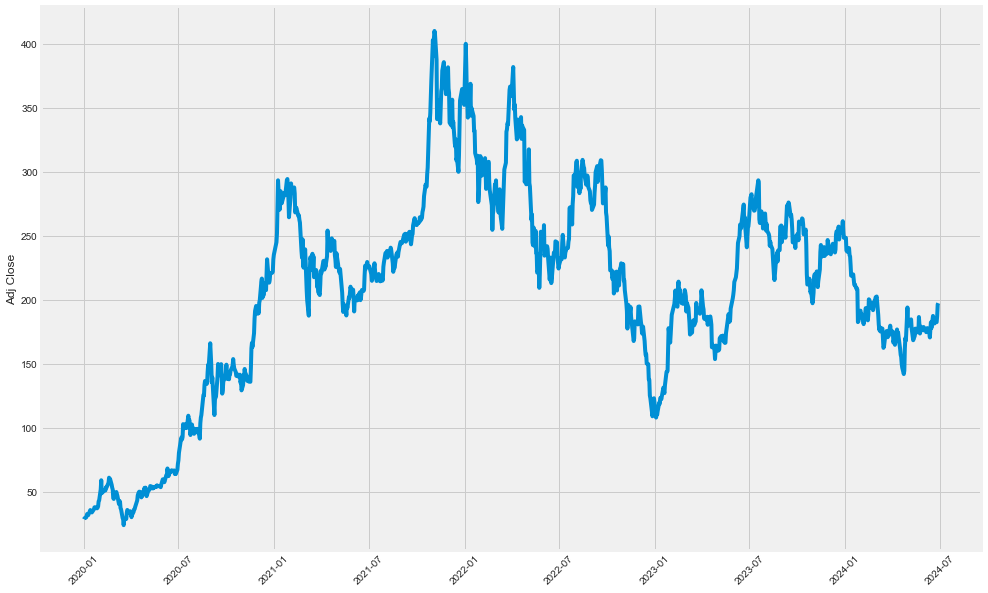

In [60]:
tsla['Date'] = pd.to_datetime(tsla['Date'])
plt.figure(figsize=(15,10))
plt.plot(tsla['Date'],tsla['Adj Close'])
# msft.plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.xticks(rotation = 45 )
plt.show()


In [10]:
tsla['Date'] = pd.to_datetime(tsla['Date'])

<Axes: title={'center': 'Tesla Stock Price every 10,20,50 rolling days'}>

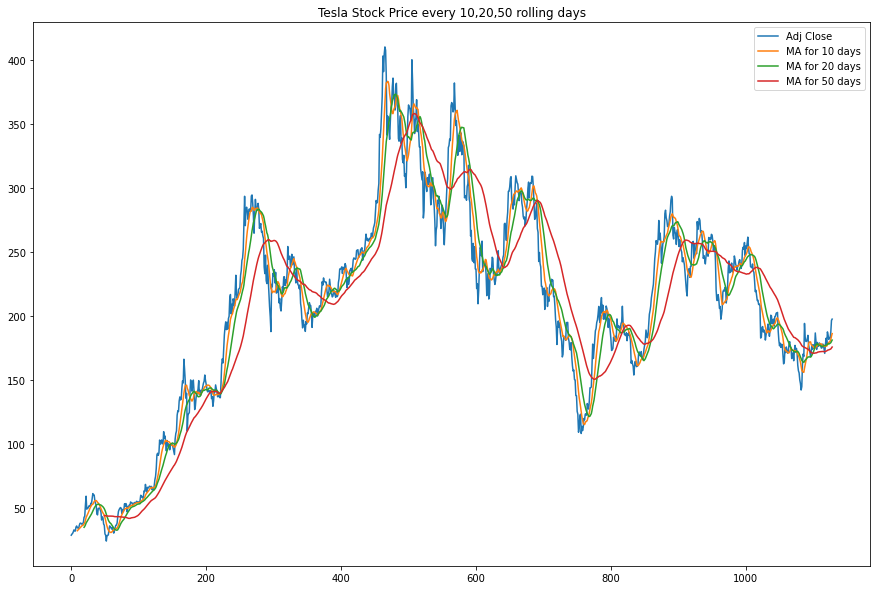

In [23]:
tsla[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15,10),title='Tesla Stock Price every 10,20,50 rolling days')


### Handle missing dates

In [23]:
msft_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1535 non-null   datetime64[ns]
 1   text    1535 non-null   object        
 2   input   1535 non-null   object        
 3   label   1535 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 48.1+ KB


In [7]:
msft_sent['label'].value_counts(dropna=False).to_frame('count').join(
    msft_sent['label'].value_counts(dropna=False, normalize=True).to_frame('normalize')
).round(4)

,count,normalize
label,,
neutral,796,0.5186
negative,500,0.3257
positive,239,0.1557


51.8567 % 마이크로 소프트 감정라벨이 Neutral임


In [8]:
# 1. 우선, sentiment에서 주식시장 안열린 날짜의 뉴스는 제외한다
missing_stock_dates = pd.date_range(start = '2020-01-01', end = '2024-06-28' ).difference(msft.Date) # 주식거래 없는 날
missing_sent_dates = pd.date_range(start = '2020-01-01', end = '2024-06-28' ).difference(msft_sent.date) # 뉴스 없는 날
#-> 이 날짜를 제외한 모든 df의 rows 들을 가져온다.
no_trade_dates = missing_stock_dates.tolist()
msft_sent.loc[(msft_sent["date"].isin(no_trade_dates))]
# msft_sent[~msft.index.isin(no_trade_dates)]
# 2. 주식거래 안하는 날짜를 제외한 후, 뉴스 기사가 없는날짜가 몇개인지 확인한다.
# 3. 각 날짜별 최대 뉴스 갯수가 몇개인지 확인.
# 4. 각 감정 라벨별의 분포를 확인한다. 

,date,text,input,label
1,2021-01-23,"Microsoft, Starbucks and Amazon are among the ...",Analyze the sentiment of the news headline enc...,positive
15,2021-01-24,When companies move all employee communication...,Analyze the sentiment of the news headline enc...,neutral
16,2021-01-10,Tim Berners-Lee wants to put people in control...,Analyze the sentiment of the news headline enc...,neutral
33,2021-02-13,Former executives at the tech giant give an in...,Analyze the sentiment of the news headline enc...,neutral
36,2021-02-20,What does the road to recovery look like? Let’...,Analyze the sentiment of the news headline enc...,neutral
...,...,...,...,...
1433,2020-08-16,Millions of children have flocked to the onlin...,Analyze the sentiment of the news headline enc...,positive
1440,2020-09-13,The moves came as the clock ticks down on Pres...,Analyze the sentiment of the news headline enc...,neutral
1460,2020-09-05,Pandemic policies at tech companies have creat...,Analyze the sentiment of the news headline enc...,negative
1467,2020-10-25,"In a landmark antitrust complaint, the Justice...",Analyze the sentiment of the news headline enc...,negative


1535 개의 articles 중 147개의 article은 trade가 없는 날의 기사임.

In [9]:
# trade가 있는 날의 msft 기사
msft_sent_trade = msft_sent.loc[~(msft_sent["date"].isin(no_trade_dates))].reset_index()
msft_sent_trade

,index,date,text,input,label
0,0,2021-01-29,"A month after the holiday season, gamers are s...",Analyze the sentiment of the news headline enc...,negative
1,2,2021-01-26,The company had its first $5 billion quarter f...,Analyze the sentiment of the news headline enc...,positive
2,3,2021-01-04,Chief executives and other leaders from many o...,Analyze the sentiment of the news headline enc...,positive
3,4,2021-01-27,The stock has soared to scarcely believable le...,Analyze the sentiment of the news headline enc...,neutral
4,5,2021-01-25,"Selling consumer electronics is hard, forcing ...",Analyze the sentiment of the news headline enc...,negative
...,...,...,...,...,...
1383,1530,2020-12-15,The private helicopter taxi company is merging...,Analyze the sentiment of the news headline enc...,neutral
1384,1531,2020-12-09,Regulators are accusing the company of buying ...,Analyze the sentiment of the news headline enc...,negative
1385,1532,2020-12-18,The cryptocurrency giant’s initial public offe...,Analyze the sentiment of the news headline enc...,neutral
1386,1533,2020-12-14,Roblox delayed its debut as Wall Street worrie...,Analyze the sentiment of the news headline enc...,negative


In [10]:
stock_date_list = msft['Date'].tolist()
trading_day_num = len(stock_date_list)
print(f'Total number of stock trading days :{len(stock_date_list)}')
sent_date_list = msft_sent_trade['date'].tolist()

for date in sent_date_list:
    if date in stock_date_list:
        stock_date_list.remove(date)
print(f'Total number of no article days during stock trading days :{len(stock_date_list)}')

print(f'Percentage of missing article days : {(len(stock_date_list)/trading_day_num)*100} %')


Total number of stock trading days :1129
Total number of no article days during stock trading days :379
Percentage of missing article days : 33.56953055801594 %


In [11]:
stock_date_list

[Timestamp('2020-01-03 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-14 00:00:00'),
 Timestamp('2020-01-21 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-21 00:00:00'),
 Timestamp('2020-02-25 00:00:00'),
 Timestamp('2020-03-03 00:00:00'),
 Timestamp('2020-03-04 00:00:00'),
 Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-03-10 00:00:00'),
 Timestamp('2020-03-12 00:00:00'),
 Timestamp('2020-03-17 00:00:00'),
 Timestamp('2020-03-18 00:00:00'),
 Timestamp('2020-03-19 00:00:00'),
 Timestamp('2020-03-24 00:00:00'),
 Timestamp('2020-03-25 00:00:00'),
 Timestamp('2020-03-31 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-04-03 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-09 00:00:00'),
 Timestamp('2020-04-13 00:00:00'),
 Timestamp('2020-04-

### Percentages and count of each sentiment label

In [12]:
# 개수랑 비율 같이. column명도 바꿔서 표시
sentiment_count = msft_sent_trade['label'].value_counts(dropna=False).to_frame('count').join(
    msft_sent_trade['label'].value_counts(dropna=False, normalize=True).to_frame('normalize')
).round(4)
sentiment_count

,count,normalize
label,,
neutral,704,0.5072
negative,458,0.3300
positive,226,0.1628


array([<Axes: ylabel='count'>], dtype=object)

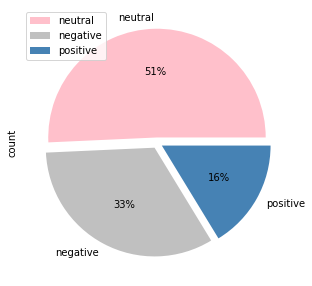

In [87]:
# Defining colors for the pie chart 
colors = ['pink', 'silver', 'steelblue'] 
  
# Define the ratio of gap of each fragment in a tuple 
explode = (0.05, 0.05, 0.05) 
sentiment_count.plot.pie(y='count',figsize=(5, 5),subplots=True,autopct='%1.0f%%', 
  colors=colors, explode=explode)

In [13]:
article_count_by_date = msft_sent_trade['date'].value_counts(dropna=False).to_frame('count')
article_count_by_date['date'] = article_count_by_date.index
article_count_by_date
# article_count_by_date.reset_index()

,count,date
date,,
2023-11-20,9,2023-11-20
2022-01-18,7,2022-01-18
2023-10-13,7,2023-10-13
2024-01-25,6,2024-01-25
2023-05-25,6,2023-05-25
...,...,...
2022-11-02,1,2022-11-02
2022-11-29,1,2022-11-29
2022-11-09,1,2022-11-09


In [15]:
msft_sent_trade[msft_sent_trade['date'] == '2023-11-20']

,index,date,text,input,label
806,875,2023-11-20,"Mr. Nadella moved fast to hire Sam Altman, who...",Analyze the sentiment of the news headline enc...,neutral
807,876,2023-11-20,The tech giant moved quickly to hire Sam Altma...,Analyze the sentiment of the news headline enc...,positive
816,885,2023-11-20,What comes next after Sam Altman’s messy ouste...,Analyze the sentiment of the news headline enc...,neutral
817,886,2023-11-20,A board member who was part of Sam Altman’s ou...,Analyze the sentiment of the news headline enc...,negative
818,887,2023-11-20,It is hard to see the past few days as anythin...,Analyze the sentiment of the news headline enc...,negative
820,889,2023-11-20,Big Tech is reeling from the ouster of Sam Alt...,Analyze the sentiment of the news headline enc...,neutral
821,890,2023-11-20,Hundreds of OpenAi employees signed a letter o...,Analyze the sentiment of the news headline enc...,neutral
824,894,2023-11-20,The announcement capped a tumultuous weekend f...,Analyze the sentiment of the news headline enc...,neutral
831,902,2023-11-20,"Tim Sweeney, who runs the company that created...",Analyze the sentiment of the news headline enc...,neutral


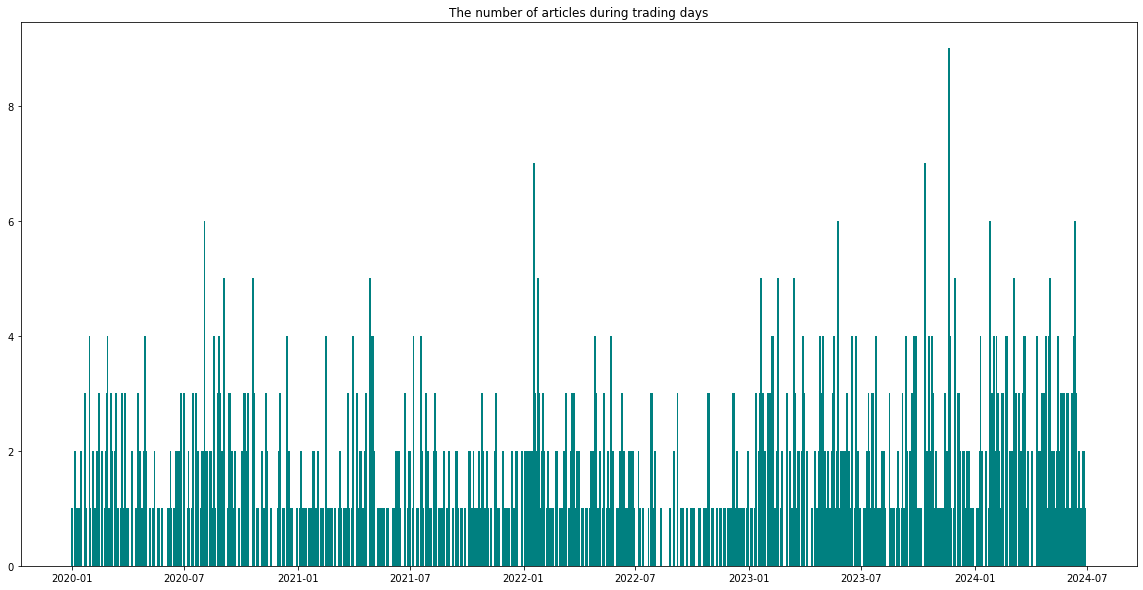

In [78]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(article_count_by_date['date'], article_count_by_date['count'], width=3,color='#008080')
ax.xaxis_date()
plt.title('The number of articles during trading days')
plt.show()

# Sentiment Score

### Data Preprocessing

In [26]:
msft_sent = pd.read_csv('./data/msft_with_sentiment_label.csv')
msft_sent

,date,text,input,label
0,2021-01-29,"A month after the holiday season, gamers are s...",Analyze the sentiment of the news headline enc...,negative
1,2021-01-23,"Microsoft, Starbucks and Amazon are among the ...",Analyze the sentiment of the news headline enc...,positive
2,2021-01-26,The company had its first $5 billion quarter f...,Analyze the sentiment of the news headline enc...,positive
3,2021-01-04,Chief executives and other leaders from many o...,Analyze the sentiment of the news headline enc...,positive
4,2021-01-27,The stock has soared to scarcely believable le...,Analyze the sentiment of the news headline enc...,neutral
...,...,...,...,...
1530,2020-12-15,The private helicopter taxi company is merging...,Analyze the sentiment of the news headline enc...,neutral
1531,2020-12-09,Regulators are accusing the company of buying ...,Analyze the sentiment of the news headline enc...,negative
1532,2020-12-18,The cryptocurrency giant’s initial public offe...,Analyze the sentiment of the news headline enc...,neutral
1533,2020-12-14,Roblox delayed its debut as Wall Street worrie...,Analyze the sentiment of the news headline enc...,negative


In [27]:
msft_sent = msft_sent.drop(['input'],axis = 1)
msft_sent = msft_sent.sort_values(by='date')
msft_sent

,date,text,label
1246,2020-01-02,Emerging details suggest that the former Nissa...,neutral
1238,2020-01-07,The company said it would remove videos altere...,neutral
1247,2020-01-07,The maker of home speakers said Google and Ama...,negative
1229,2020-01-08,"Stocks rallied, and oil fell, after it became ...",positive
1230,2020-01-09,The S&P 500 added to a nearly 30 percent rally...,positive
...,...,...,...
1179,2024-06-25,The tech giant has been accused of stifling co...,negative
1196,2024-06-25,The chipmaker’s stock has tumbled in recent da...,negative
1220,2024-06-27,"Tax policy, inflation, the economy and markets...",neutral
1199,2024-06-28,"The S&P 500 has climbed sharply this year, wit...",neutral


### Add the numeric label of sentiment
- if label is Positive, 1
- if label is Neutral, 0
- if label is Negative, -1

In [28]:

msft_sent['sentiment'] = msft_sent["label"].apply(lambda x: 1 if x == 'positive' else (-1 if x == 'negative' else 0))


In [29]:
msft_sent

,date,text,label,sentiment
1246,2020-01-02,Emerging details suggest that the former Nissa...,neutral,0
1238,2020-01-07,The company said it would remove videos altere...,neutral,0
1247,2020-01-07,The maker of home speakers said Google and Ama...,negative,-1
1229,2020-01-08,"Stocks rallied, and oil fell, after it became ...",positive,1
1230,2020-01-09,The S&P 500 added to a nearly 30 percent rally...,positive,1
...,...,...,...,...
1179,2024-06-25,The tech giant has been accused of stifling co...,negative,-1
1196,2024-06-25,The chipmaker’s stock has tumbled in recent da...,negative,-1
1220,2024-06-27,"Tax policy, inflation, the economy and markets...",neutral,0
1199,2024-06-28,"The S&P 500 has climbed sharply this year, wit...",neutral,0


In [47]:
sent_score = msft_sent.groupby([msft_sent['date']])['sentiment'].mean().to_frame('score')
sent_score

,score
date,
2020-01-02,0.0
2020-01-07,-0.5
2020-01-08,1.0
2020-01-09,1.0
2020-01-10,-1.0
...,...
2024-06-23,0.0
2024-06-24,-0.5
2024-06-25,-1.0


In [42]:
sent_score.describe()

,score
count,862.000000
mean,-0.180103
std,0.555457
min,-1.000000
25%,-0.500000
50%,0.000000
75%,0.000000
max,1.000000


In [67]:
print(f'@@@@@@@@@@@@Negative Sentiment@@@@@@@@@@@@@@@')
neg = sent_score[sent_score['score'] <0].count().tolist()[0]
print(f'Count : {neg}')
print(f'Percentage: {(neg/len(sent_score))*100:.2f} %')
print(f'@@@@@@@@@@@@Neutral Sentiment@@@@@@@@@@@@@@@')
neu = sent_score[sent_score['score'] ==0].count().tolist()[0]
print(f'Count : {neu}')
print(f'Percentage: {(neu/len(sent_score))*100:.2f} %')

print(f'@@@@@@@@@@@@Positive Sentiment@@@@@@@@@@@@@@@')
pos = sent_score[sent_score['score'] >0].count().tolist()[0]
print(f'Count : {pos}')
print(f'Percentage: {(pos/len(sent_score))*100:.2f} %')

@@@@@@@@@@@@Negative Sentiment@@@@@@@@@@@@@@@
Count : 344
Percentage: 39.91 %
@@@@@@@@@@@@Neutral Sentiment@@@@@@@@@@@@@@@
Count : 377
Percentage: 43.74 %
@@@@@@@@@@@@Positive Sentiment@@@@@@@@@@@@@@@
Count : 141
Percentage: 16.36 %


In [40]:
len(msft_sent['date'].unique().tolist())

862

In [68]:
sent_score['score'].unique()

array([ 0.        , -0.5       ,  1.        , -1.        , -0.33333333,
        0.25      ,  0.5       ,  0.66666667, -0.66666667,  0.33333333,
       -0.16666667, -0.4       , -0.25      ,  0.8       ,  0.2       ,
       -0.14285714, -0.75      , -0.6       , -0.2       ,  0.57142857,
       -0.11111111])

In [71]:
sent_score['date'] = sent_score.index
sent_score

,score,date
date,,
2020-01-02,0.0,2020-01-02
2020-01-07,-0.5,2020-01-07
2020-01-08,1.0,2020-01-08
2020-01-09,1.0,2020-01-09
2020-01-10,-1.0,2020-01-10
...,...,...
2024-06-23,0.0,2024-06-23
2024-06-24,-0.5,2024-06-24
2024-06-25,-1.0,2024-06-25


# Data Cleansing and Preprocessing

# Feature Scaling

In [96]:
msft.drop("Date",axis=1,inplace=True)
msft

,Open,High,Low,Close,Adj Close,Volume
0,158.779999,160.729996,158.330002,160.619995,154.215683,22622100
1,158.320007,159.949997,158.059998,158.619995,152.295425,21116200
2,157.080002,159.100006,156.509995,159.029999,152.689056,20813700
3,159.320007,159.669998,157.320007,157.580002,151.296906,21634100
4,158.929993,160.800003,157.949997,160.089996,153.706772,27746500
...,...,...,...,...,...,...
1124,447.380005,450.579987,446.510010,449.779999,449.779999,34486200
1125,449.799988,452.750000,446.410004,447.670013,447.670013,15913700
1126,448.250000,451.420013,446.750000,450.950012,450.950012,16747500
1127,449.000000,453.600006,448.190002,452.160004,452.160004,16507000


In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
msft.iloc[:,:] = scaler.fit_transform(msft.iloc[:,:])
msft

,Open,High,Low,Close,Adj Close,Volume
0,0.069074,0.063878,0.080846,0.079388,0.073929,0.152841
1,0.067614,0.061407,0.080000,0.073087,0.067974,0.135692
2,0.063680,0.058714,0.075145,0.074379,0.069195,0.132247
3,0.070787,0.060520,0.077682,0.069811,0.064877,0.141590
4,0.069550,0.064100,0.079655,0.077718,0.072350,0.211198
...,...,...,...,...,...,...
1124,0.984770,0.982288,0.983524,0.990329,0.990480,0.287950
1125,0.992449,0.989163,0.983211,0.983681,0.983937,0.076446
1126,0.987531,0.984949,0.984276,0.994014,0.994108,0.085942
1127,0.989910,0.991857,0.988786,0.997826,0.997860,0.083203


In [98]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,0.450761,0.447941,0.449915,0.452937,0.446979,0.232177
std,0.222029,0.222038,0.218355,0.220441,0.221907,0.146156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.293334,0.292459,0.294252,0.294396,0.291273,0.139458
50%,0.427325,0.424683,0.424307,0.428378,0.422579,0.196525
75%,0.599708,0.600190,0.597745,0.603535,0.596512,0.277904
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train & Test set Split

In [84]:

import random

from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import BDay

# Visualization Imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import scipy.stats as stats

# Neural Network Imports
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint

# Setting seed
SEED = 0
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Visualization Configurations
pio.templates.default = "plotly_dark"
%config InlineBackend.figure_format = 'retina'

In [87]:
columns = ['open', 'high', 'low', 'close', 'volume']

msft.columns = msft.columns.str.lower()

# Showing data
msft.tail()

,date,open,high,low,close,adj close,volume
1124,2024-06-21,447.380005,450.579987,446.510010,449.779999,449.779999,34486200
1125,2024-06-24,449.799988,452.750000,446.410004,447.670013,447.670013,15913700
1126,2024-06-25,448.250000,451.420013,446.750000,450.950012,450.950012,16747500
1127,2024-06-26,449.000000,453.600006,448.190002,452.160004,452.160004,16507000
1128,2024-06-27,452.179993,456.170013,451.769989,452.850006,452.850006,14806300


# LSTM Data Prep

<center>
<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png"  width="60%" height="30%">
</center>

In machine learning, it's often crucial, especialy when using neural networks, to normalize data before feeding it into a model. This process adjusts values measured on different scales to a notionally common scale, often prior to averaging. Here, we use the `MinMaxScaler` from the `sklearn.preprocessing` package, which scales each feature by its maximum and minimum values. This scaler transforms each value `v` in a feature column to `v'` in the range [0, 1] using the following formula:
$$v' = \frac{v - \text{min}(v)}{\text{max}(v) - \text{min}(v)}$$
- `v` is the original value.
- `min(v)` is the minimum value in the feature column.
- `max(v)` is the maximum value in the feature column.
The columns `['open', 'high', 'low', 'close', 'volume']` from the Tesla stock dataset are normalized, which includes the opening, high, low, and closing prices along with the trading volume. Normalizing these features allows for a more stable and faster convergence during the training of neural networks, like the LSTM model we'll be using for stock price forecasting.

In [88]:
class RNNFormater:
    
    def __init__(self, data: pd.DataFrame, mapping_steps=10):
        """
        Initialize the RNNFormater with a DataFrame and steps to map for data.
        
        Args:
            data (pd.DataFrame): Input DataFrame containing time series data.
            mapping_steps (int): Number of time steps for each input sequence to be mapped to output.
        """
        # Storing data
        self.df = data.copy()
        self.data = self.df.values

        # Scaler stored for usage later
        self.scaler = MinMaxScaler()
        self.normalized_data = self.scaler.fit_transform(self.data)
        
        self.time_steps = data.shape[0]
        self.n_columns = data.shape[1]

        # Number of mapping steps
        self.mapping_steps = mapping_steps

    def data_mapping(self):
        """
        Maps a 2D array into a 3D array for RNNs input, with each sequence having mapping_steps time steps.
    
        Args:
            mapping_steps (int): Number of time steps for each sequence.
    
        Returns:
            np.array: A 3D array suitable for RNN inputs.
        """
        mapping_steps = self.mapping_steps + 1
        
        mapping_iterations = self.time_steps - mapping_steps + 1
        self.normalized_data_mapped = np.empty((mapping_iterations, mapping_steps, self.n_columns))
        
        for i in range(mapping_iterations):
            self.normalized_data_mapped[i, :, :] = self.normalized_data[i:i + mapping_steps, :]
        
        return self.normalized_data_mapped
    
    def rnn_train_test_split(self, test_percent=0.1):
        """
        Splits the 3D mapped data into training and testing sets for an RNN.
        
        Args:
            test_percent (float): The fraction of data to be used for testing.
        
        Returns:
            tuple: X_train, X_test, y_train, y_test
        """
        self.test_size = int(np.round(self.normalized_data_mapped.shape[0] * test_percent))
        self.train_size = self.normalized_data_mapped.shape[0] - self.test_size
        
        X_train = self.normalized_data_mapped[:self.train_size, :-1, :] 
        y_train = self.normalized_data_mapped[:self.train_size, -1, :]
        
        X_test = self.normalized_data_mapped[self.train_size:, :-1, :]
        y_test = self.normalized_data_mapped[self.train_size:, -1, :]
        
        return X_train, X_test, y_train, y_test  

    def forecast_n_steps(self, model, data: pd.DataFrame, n_forecast_steps=30):
        """
        Forecast multiple steps ahead using the LSTM model.
    
        Args:
            model (tf.keras.Model): Trained LSTM model for prediction.
            data (pd.DataFrame): Input DataFrame containing the latest time series data.
            n_forecast_steps (int): Number of future steps to forecast.
    
        Returns:
            np.array: Forecasted values for n_forecast_steps.
        """
        # Scaling the latest 'mapping_steps' data for mapping
        last_steps = self.scaler.transform(data.values)[-self.mapping_steps:]
    
        # Initialize normalized_data_mapped array
        normalized_data_mapped = np.empty((n_forecast_steps, self.mapping_steps, self.n_columns))
    
        # Initialize predictions array
        predictions = np.empty((n_forecast_steps, self.n_columns))
    
        # Predict the first step
        normalized_data_mapped[0, :, :] = last_steps
        predictions[0, :] = model.predict(
            normalized_data_mapped[0, :, :].reshape(1, self.mapping_steps, self.n_columns),
            verbose=False
        )
        # Generate predictions and update normalized_data_mapped for each subsequent step
        for i in range(1, n_forecast_steps):
            # Shift the window and insert new prediction at end
            normalized_data_mapped[i, :-1, :] = normalized_data_mapped[i - 1, 1:, :]
            normalized_data_mapped[i, -1, :] = predictions[i - 1, :]
    
            # Predicting next step
            norm_data = normalized_data_mapped[i, :, :].reshape(1, self.mapping_steps, self.n_columns)
            predictions[i, :] = model.predict(norm_data, verbose=False)
    
        # Inverse transform the predictions to original scale
        predictions = self.scaler.inverse_transform(predictions)
        return predictions

In [89]:
# Initializing class
mapping_steps = 32 # ~ 1 months in buisness days
rnn_formater = RNNFormater(msft[columns], mapping_steps=mapping_steps)

# Mapping steps
norm_data_mapped = rnn_formater.data_mapping() # n_steps -> y
# print(f'Mapped Normalized data step 0:\n{norm_data_mapped[0]}')
print(f'Normalized data shape: {norm_data_mapped[0].shape}')

Normalized data shape: (33, 5)


In [90]:
# Train Test Split
X_train, X_test, y_train, y_test = rnn_formater.rnn_train_test_split(test_percent=0.05)
print(f'Number of time steps for test set: {rnn_formater.test_size}')

print(f'X shape: {X_train.shape}')
# print(X_train[0])

print(f'y shape: {y_train.shape}')
# print(y_train[0])

Number of time steps for test set: 55
X shape: (1042, 32, 5)
y shape: (1042, 5)


# Vanilla LSTM Model Building

In [91]:
# For consistant results
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# Vanilla LSTM
model = models.Sequential([
    LSTM(units=80, input_shape=(mapping_steps, len(columns))),
    Dropout(0.05),
    Dense(units=len(columns))   
])

# Compiling model
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80)                27520     
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 5)                 405       
                                                                 
Total params: 27925 (109.08 KB)
Trainable params: 27925 (109.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
# Callback to save model weights
model_checkpoint = ModelCheckpoint('LSTM_Microsoft_model.h5', monitor='val_loss', save_best_only=True)

# Fitting the model
history = model.fit(X_train, y_train, 
                    batch_size=256, 
                    epochs=1_000, 
                    validation_data=(X_test, y_test), 
                    callbacks=[model_checkpoint],
                    shuffle=False,
                    verbose=False)

In [94]:
def plot_training_history(history, plot_title='Training Performance', plot_legends=None, color0=0):
    """
    Plots the training history of a model using Plotly.

    Args:
        history (dict): A dictionary containing the training history metrics.
        plot_title (str): Title of the plot.
        plot_legends (list): List of legends for the plot. If None, it uses the keys from the history dictionary.

    Returns:
        None: Displays the plot.
    """
    # Extracting metrics from the history object
    epochs = np.arange(1, len(next(iter(history.values()))) + 1)
    colors = ['blue', 'gold', 'violet', 'lime', 'blue', 'pink', 'yellow']
    data = []

    # If no legends are provided, use keys from the history
    if not plot_legends:
        plot_legends = list(history.keys())

    # Prepare data for each metric in the history
    for i, (key, legend) in enumerate(zip(history.keys(), plot_legends)):
        color_index = i % len(colors) + color0
        data.append(go.Scatter(x=epochs, y=history[key], mode='lines+markers', name=legend, line=dict(color=colors[color_index])))

    # Add error for minimum epoch value
    min_epoch = np.argmin(history['val_loss']) + 1 
    loss_str = f"Train Loss: {history['loss'][min_epoch-1]:.3e}<br>Test Loss: {history['val_loss'][min_epoch - 1]:.3e}"

    # Creating the layout
    layout = go.Layout(title=plot_title, xaxis=dict(title='Epochs'), yaxis=dict(title='Value'), width=1100, height=600)
    fig = go.Figure(data=data, layout=layout)

    # Annotate the minimum loss with an arrow
    fig.add_annotation(
        go.layout.Annotation(
            x=min_epoch,
            y=history['loss'][min_epoch - 1],
            xref="x",
            yref="y",
            text=loss_str,
            showarrow=True,
            arrowhead=7,
            arrowcolor='green',
            arrowsize=2,
            bordercolor='green',
            borderwidth=2,
            ax=0,
            ay=-40
        )
    )
    fig.show()

In [96]:
# Plotting LSTM model loss
plot_training_history(history.history, plot_title='LSTM Model Loss')

In [97]:
def highlight_half(data: pd.DataFrame, axis=1, precision=3):
    
    s = data.shape[1] if axis else data.shape[0]
    data_style = data.style.format(precision=precision)

    def apply_style(val):
        style1 = 'background-color: red; color: white'
        style2 = 'background-color: blue; color: white'
        return [style1 if x < s//2 else style2 for x in range(s)]

    display(data_style.apply(apply_style, axis=axis))

In [99]:
# Loading best wieghts during training
model = models.load_model(f'LSTM_Microsoft_model.h5')

# Predicting
predictions = model.predict(X_test, verbose=False)
predictions = rnn_formater.scaler.inverse_transform(predictions)

# Showing predictions and data
index_1 = y_test.shape[0]
df_y_test = msft[columns].iloc[-index_1:]
df_predictions = pd.DataFrame(predictions, index=df_y_test.index, columns=[f'pred_{col}' for col in columns])
df_test_pred = pd.concat([df_y_test, df_predictions], axis=1)
                         
# Shwoing outputs
df_test_pred.tail()

,open,high,low,close,volume,pred_open,pred_high,pred_low,pred_close,pred_volume
1124,447.380005,450.579987,446.510010,449.779999,34486200,445.579987,447.491058,442.817291,444.896973,16228675.0
1125,449.799988,452.750000,446.410004,447.670013,15913700,449.601074,452.095398,446.386749,448.782806,20815086.0
1126,448.250000,451.420013,446.750000,450.950012,16747500,450.566528,452.854462,447.842407,450.466980,15989811.0
1127,449.000000,453.600006,448.190002,452.160004,16507000,451.731781,453.508728,448.990051,451.223480,15508693.0
1128,452.179993,456.170013,451.769989,452.850006,14806300,453.019775,454.597046,450.140228,452.230347,15316191.0


# LSTM Resdiual Analysis Building

In [100]:
# Error dataframe
df_error = pd.DataFrame(df_predictions.values - df_y_test.values, index=df.index[-index_1:], columns=[f'error_{col}' for col in columns])
print('RMSE Per Column')
print((df_error**2).mean()**(1/2))

RMSE Per Column
error_open      4.356711e+00
error_high      4.589776e+00
error_low       5.339077e+00
error_close     5.630495e+00
error_volume    6.967294e+06
dtype: float64


In [101]:
def plotly_residual_analysis(df, title_add=''):
    """
    Perform residual analysis for multiple features in a DataFrame.
    The DataFrame should contain actual and predicted columns for each feature.
    
    Args:
        df (pd.DataFrame): DataFrame containing actual and predicted columns.
        title_add (str, optional): Additional title for the subplots.
    """
    # Number of columns
    columns = [col for col in df.columns if not col.startswith('pred_')]
    num_features = len(columns)

    # Color per column
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']

    # Subplots per columns
    fig = make_subplots(rows=num_features, cols=4, vertical_spacing=0.035, horizontal_spacing=0.035,
                        subplot_titles=("Histogram", "QQ-Normal Plot", "Residuals vs. Predicted Values", "Residuals vs Index"))

    for i, col in enumerate(columns):
        actual = df[col]
        predicted = df[f'pred_{col}']
        residuals = actual - predicted
        mean_residuals = np.mean(residuals)
        sd_residuals = np.std(residuals)
        rmse = np.sqrt(np.mean(residuals**2))
        index = df.index

        # Assign color for each feature
        color = colors[i % len(colors)]

        # Histogram of residuals
        fig.add_trace(go.Histogram(x=residuals, nbinsx=30, name=f'{col.title()} Residuals', marker_color=color), row=i+1, col=1)
        # Add lines for mean and standard deviation
        fig.add_vline(x=mean_residuals, line=dict(color='black', width=2), row=i+1, col=1)
        fig.add_vline(x=mean_residuals + sd_residuals, line=dict(color='grey', width=2, dash='dash'), row=i+1, col=1)
        fig.add_vline(x=mean_residuals - sd_residuals, line=dict(color='grey', width=2, dash='dash'), row=i+1, col=1)
        fig.add_annotation(x=mean_residuals, y=5, text=f"Mean: {mean_residuals:.2f}", showarrow=True, row=i+1, col=1)
        fig.add_annotation(x=sd_residuals + mean_residuals, y=5, text=f"SD: {sd_residuals:.2f}", showarrow=False, row=i+1, col=1)
        
        # QQ-Normal of residuals
        qq = stats.probplot(residuals, dist="norm", plot=None)
        fig.add_trace(go.Scatter(x=qq[0][0], y=qq[1][1] + qq[1][0]*qq[0][0], mode='lines',  showlegend=False), row=i+1, col=2)
        fig.add_trace(go.Scatter(x=qq[0][0], y=qq[0][1], mode='markers', marker_color=color, name=f'{col.title()} QQ'), row=i+1, col=2)

        # Residuals vs. predicted values
        fig.add_trace(go.Scatter(x=predicted, y=residuals, mode='markers', marker_color=color, name=f'{col.title()} Resid Pred'), row=i+1, col=3)
        fig.add_hline(y=0, line=dict(color='red'), row=i+1, col=3)
        fig.add_hline(y=2 * rmse, line=dict(color='red', dash='dash'), row=i+1, col=3)
        fig.add_hline(y=-2 * rmse, line=dict(color='red', dash='dash'), row=i+1, col=3)

        # Residuals vs. index
        fig.add_trace(go.Scatter(x=index, y=residuals, mode='markers', marker_color=color, name=f'{col.title()} Resid Index'), row=i+1, col=4)
        fig.add_hline(y=0, line=dict(color='red'), row=i+1, col=4)
        fig.add_hline(y=2 * rmse, line=dict(color='red', dash='dash'), row=i+1, col=4)
        fig.add_hline(y=-2 * rmse, line=dict(color='red', dash='dash'), row=i+1, col=4)

    # Update layout
    fig.update_layout(height=250*num_features, width=1400, title_text="Residual Analysis " + title_add)
    fig.show()

In [103]:
# Residual Analysis Plot
plotly_residual_analysis(df_test_pred, 
                         title_add=f'- Microsoft Vanilla LSTM')

# Vanila LSTM Predictions

In [105]:
def plot_predictions(y_values_df, predictions_df, title_add=''):
    """
    Plots actual values and predictions for each feature in separate subplots.
    
    Args:
        y_values_df (pd.DataFrame): DataFrame containing actual values.
        predictions_df (pd.DataFrame): DataFrame containing predicted values.
        title_add (str, optional): Additional title for the subplots.
    """
    # Number/color per features 
    columns = [col for col in y_values_df.columns]
    num_features = len(columns)
    actual_colors = ['cyan', 'lime', 'yellow', 'violet', 'gold', 'pink']

    # Creating subplots
    fig = make_subplots(rows=num_features, cols=1, vertical_spacing=0.03, subplot_titles=[col.title() for col in columns])

    for i, col in enumerate(columns):
        # Actual values trace
        fig.add_trace(go.Scatter(x=y_values_df.index, y=y_values_df[col], mode='lines', name=col.title(),
                                 line=dict(color=actual_colors[i % len(actual_colors)])), row=i+1, col=1)
        
        # Predicted values trace
        pred_col = f'pred_{col}'
        if pred_col in predictions_df.columns:
            fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df[pred_col], 
                                     mode='lines', name=f'Predicted {col.title()}', line=dict(color='red')), row=i+1, col=1)
            
            # Calculate RMSE and add as an annotation
            rmse = np.sqrt(np.mean((y_values_df[col] - predictions_df[pred_col]) ** 2))
            fig.add_annotation(xref='x domain', yref='y domain', x=1, y=0.05, showarrow=False,
                               text=f'RMSE: {rmse:.2f}', row=i+1, col=1, font=dict(color='red'))
    fig.update_layout(height=350*num_features, width=1100, title_text="Data & Predictions " + title_add)
    fig.show()

In [106]:
# Plotting prediction and data
plot_predictions(df_y_test, df_predictions, title_add=f'- Microsoft Vanilla LSTM')